In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [71]:
df = pd.read_excel("AutoMPG_data.xlsx")
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


In [72]:
# summarize the data
df.describe()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
count,392.000000,362.000000,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,4.782243,4.912568,23.445918,5.471939,1.94412,1.044694,2.977584,15.541327,75.979592,0.923469,1.576531,0.625000,0.173469,0.201531
std,1.663944,1.659047,7.805007,1.705783,1.04644,0.384912,0.849403,2.758864,3.683737,0.266185,0.805518,0.484742,0.379136,0.401656
min,2.145923,2.145923,9.000000,3.000000,0.68000,0.460000,1.613000,8.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.448276,3.571429,17.000000,4.000000,1.05000,0.750000,2.225250,13.775000,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.396135,4.651163,22.750000,4.000000,1.51000,0.935000,2.803500,15.500000,76.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,5.882353,6.024744,29.000000,8.000000,2.75750,1.260000,3.614750,17.025000,79.000000,1.000000,2.000000,1.000000,0.000000,0.000000
max,11.111111,11.111111,46.600000,8.000000,4.55000,2.300000,5.140000,24.800000,82.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [73]:
cdf = df[['GallonsPer100Miles', 'Weight1000lb', 'Horsepower100', 'MPG', 'Cylinders', 'Displacement100ci']]
cdf.head()

,GallonsPer100Miles,Weight1000lb,Horsepower100,MPG,Cylinders,Displacement100ci
0,5.555556,3.504,1.30,18.0,8,3.07
1,6.666667,3.693,1.65,15.0,8,3.50
2,5.555556,3.436,1.50,18.0,8,3.18
3,6.250000,3.433,1.50,16.0,8,3.04
4,5.882353,3.449,1.40,17.0,8,3.02


In [74]:
print(cdf.isnull().sum())


GallonsPer100Miles    0
Weight1000lb          0
Horsepower100         0
MPG                   0
Cylinders             0
Displacement100ci     0
dtype: int64


In [75]:
cdf['Weight1000lb'].min()

1.613

In [76]:
cdf['Weight1000lb'].max()

5.14

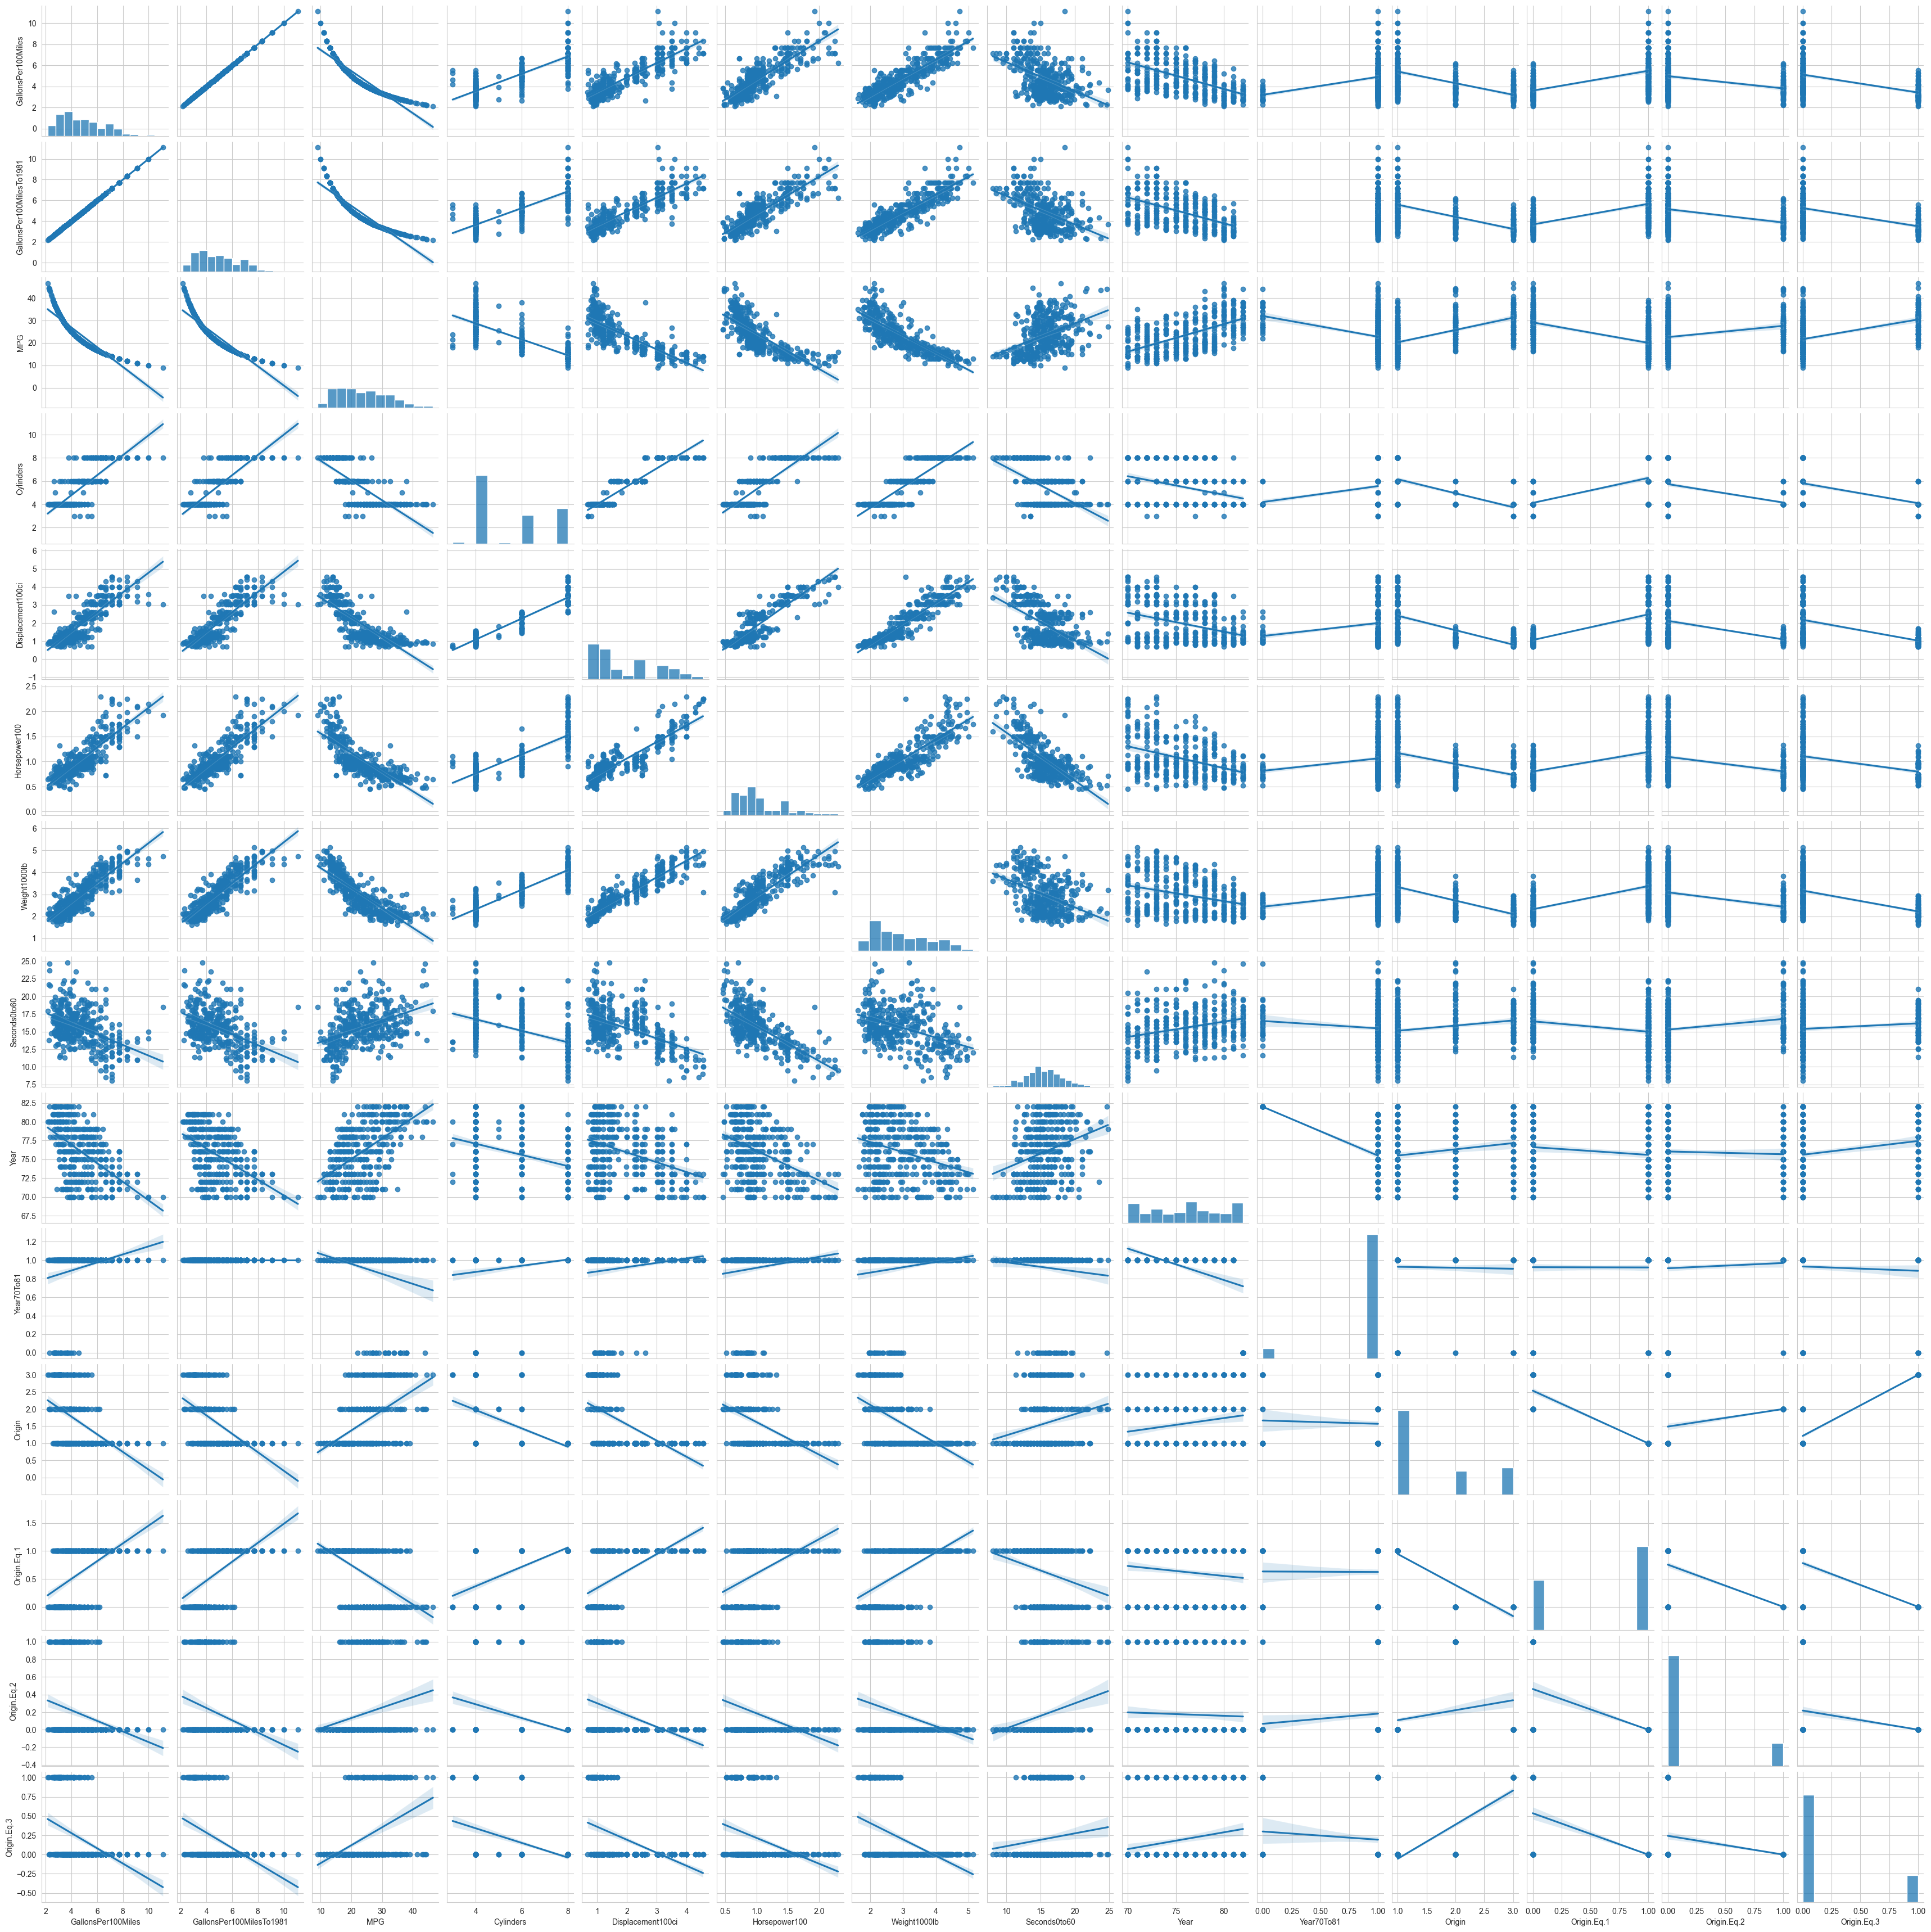

In [77]:
sns.pairplot(df, kind='reg')

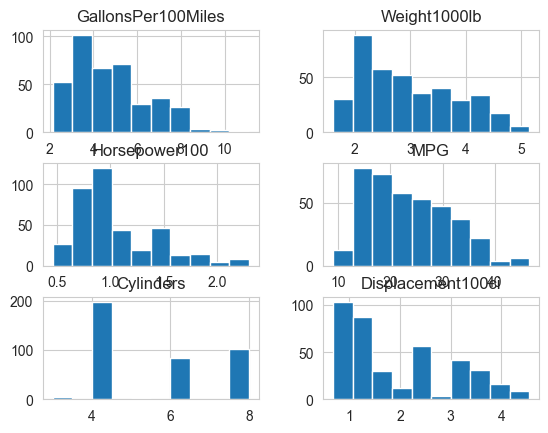

In [78]:
viz = cdf[['GallonsPer100Miles', 'Weight1000lb', 'Horsepower100', 'MPG', 'Cylinders', 'Displacement100ci']]
viz.hist()
plt.show()

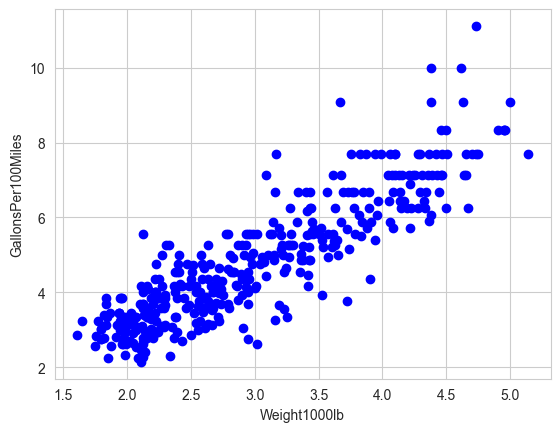

In [79]:
plt.scatter(cdf.Weight1000lb, cdf.GallonsPer100Miles, color = 'blue')
plt.xlabel("Weight1000lb")
plt.ylabel("GallonsPer100Miles")
plt.show()

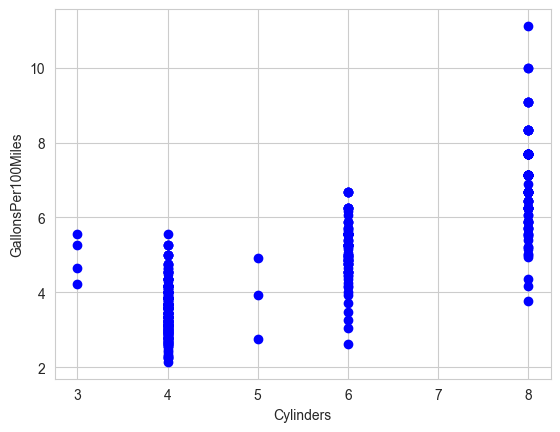

In [80]:
plt.scatter( cdf.Cylinders, cdf.GallonsPer100Miles, color = 'blue')
plt.xlabel("Cylinders")
plt.ylabel("GallonsPer100Miles")
plt.show()

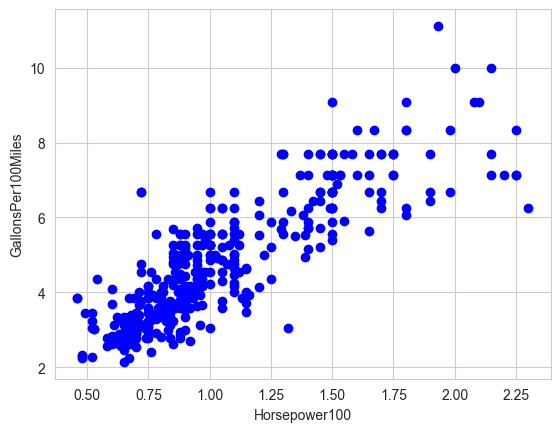

In [81]:
plt.scatter( cdf.Horsepower100, cdf.GallonsPer100Miles, color = 'blue')
plt.xlabel("Horsepower100")
plt.ylabel("GallonsPer100Miles")
plt.show()

In [82]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [83]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Horsepower100']])
train_y = np.asanyarray(train[['GallonsPer100Miles']])
regr.fit(train_x, train_y)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[3.64557015]]
Intercept:  [0.96864696]


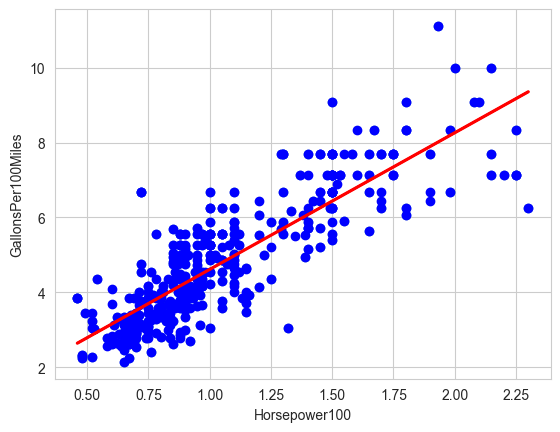

In [84]:
plt.xlabel("Horsepower100")
plt.ylabel("GallonsPer100Miles")
plt.scatter(cdf.Horsepower100, cdf.GallonsPer100Miles, color = 'blue')
plt.plot(train_x, regr.predict(train_x), '-r')

In [85]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Weight1000lb']])
test_y = np.asanyarray(test[['GallonsPer100Miles']])
test_y = regr.predict(test_x)

print("Main absolut error: %.2f" % np.mean(np.absolute(test_y - test_y)))
print("Residual sun of squares (MSE): %.2f" % np.mean((test_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y))


Main absolut error: 0.00
Residual sun of squares (MSE): 0.00
R2-score: 1.00


In [86]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Horsepower100']])
train_y = np.asanyarray(train[['GallonsPer100Miles']])
regr.fit(train_x, train_y)
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[3.64557015]]
Intercept:  [0.96864696]


Text(0, 0.5, 'GallonsPer100Miles')

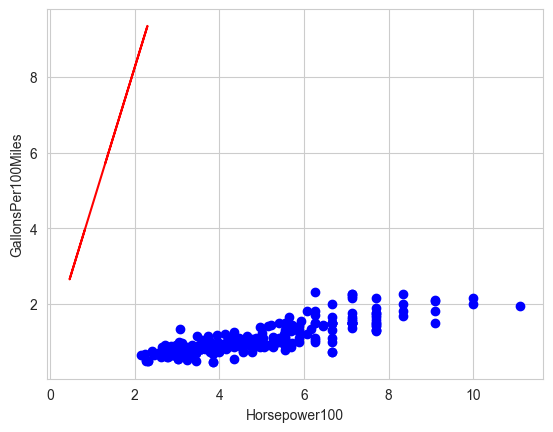

In [87]:
plt.scatter(train.GallonsPer100Miles, train.Horsepower100, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Horsepower100")
plt.ylabel("GallonsPer100Miles")

In [88]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Horsepower100']])
test_y = np.asanyarray(test[['GallonsPer100Miles']])
test_y = regr.predict(test_x)

print("Main absolut error: %.2f" % np.mean(np.absolute(test_y - test_y)))
print("Residual sun of squares (MSE): %.2f" % np.mean((test_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y))


Main absolut error: 0.00
Residual sun of squares (MSE): 0.00
R2-score: 1.00
